In [1]:
# Importing Libraries and Modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

In [2]:
# Loading and Preparing the Dataset
import glob
train = glob.glob("Alzheimer_s Dataset/train/**/*.jpg")
test = glob.glob("Alzheimer_s Dataset/test/**/*.jpg")
print("There is {} images in the training dataset".format(len(train)))
print("There is {} images in the test dataset".format(len(test)))

There is 5121 images in the training dataset
There is 1279 images in the test dataset


In [12]:
import os
main_folder = 'Alzheimer_s Dataset'
subfolders = ['train', 'test']

for subfolder in subfolders:
    subfolder_path = os.path.join('Alzheimer_s Dataset', subfolder)
    class_names = os.listdir(subfolder_path)
    
    print(f"\nNumber of images in {subfolder} folder:")
    
    for class_name in class_names:
        class_folder = os.path.join(subfolder_path, class_name)
        num_images = len(os.listdir(class_folder))
        print(f"Class {class_name}: {num_images} images")


Number of images in train folder:
Class MildDemented: 717 images
Class ModerateDemented: 52 images
Class NonDemented: 2560 images
Class VeryMildDemented: 1792 images

Number of images in test folder:
Class MildDemented: 179 images
Class ModerateDemented: 12 images
Class NonDemented: 640 images
Class VeryMildDemented: 448 images


In [4]:
images = []
labels = []

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    class_names = os.listdir(subfolder_path)
    for class_name in class_names:
        class_folder = os.path.join(subfolder_path, class_name)
        for image_filename in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_filename)
            images.append(image_path)
            labels.append(class_name)

df = pd.DataFrame({'image': images, 'label': labels})
df

,image,label
0,Alzheimer_s Dataset\train\MildDemented\mildDem...,MildDemented
1,Alzheimer_s Dataset\train\MildDemented\mildDem...,MildDemented
2,Alzheimer_s Dataset\train\MildDemented\mildDem...,MildDemented
3,Alzheimer_s Dataset\train\MildDemented\mildDem...,MildDemented
4,Alzheimer_s Dataset\train\MildDemented\mildDem...,MildDemented
...,...,...
6395,Alzheimer_s Dataset\test\VeryMildDemented\32 (...,VeryMildDemented
6396,Alzheimer_s Dataset\test\VeryMildDemented\32 (...,VeryMildDemented
6397,Alzheimer_s Dataset\test\VeryMildDemented\32 (...,VeryMildDemented
6398,Alzheimer_s Dataset\test\VeryMildDemented\32 (...,VeryMildDemented


In [5]:
# Split data into train and test subsets
train_df = df[df['image'].str.contains('train')]
test_df = df[df['image'].str.contains('test')]

In [20]:
def get_class_names_and_colors(subfolder, main_folder, colors):
    subfolder_path = os.path.join(main_folder, subfolder)
    class_names = sorted(os.listdir(subfolder_path))
    color_map = {class_name: color for class_name, color in zip(class_names, colors)}
    return class_names, color_map

def get_class_counts(folder_path, class_names):
    class_counts = []
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        num_images = len(os.listdir(class_folder))
        class_counts.append(num_images)
    return class_counts

def plot_visualizations(subfolder, df, main_folder, color_map):
    subfolder_path = os.path.join(main_folder, subfolder)
    class_names = sorted(os.listdir(subfolder_path))
    class_counts = get_class_counts(subfolder_path, class_names)
    
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    bars = plt.bar(class_names, class_counts, color=[color_map[name] for name in class_names])
    plt.title(f"Number of Images in {subfolder.capitalize()} Folder", fontsize=16)
    plt.xlabel("Class", fontsize=14)
    plt.ylabel("Number of Images", fontsize=14)
    plt.xticks(rotation=45)

    for bar, count in zip(bars, class_counts):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), ha='center', va='bottom')

    class_counts_df = df['label'].value_counts().reindex(class_names, fill_value=0)
    plt.subplot(2, 2, 2)
    plt.pie(
        class_counts_df, 
        labels=class_counts_df.index, 
        autopct='%1.1f%%', 
        colors=[color_map[name] for name in class_counts_df.index]
    )
    plt.title(f"{subfolder.capitalize()} Folder Class Distribution - Pie Chart", fontsize=16)

    plt.show()

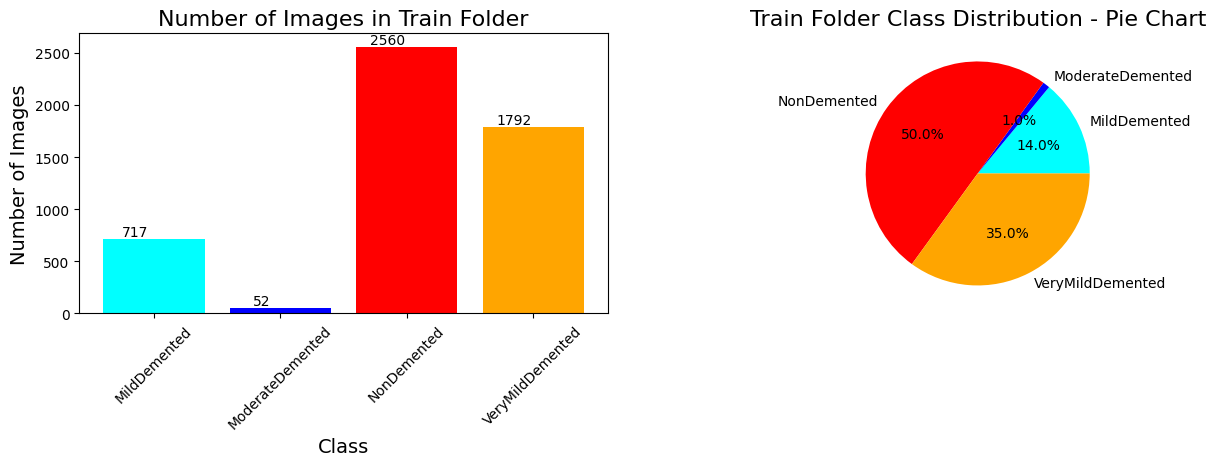

In [18]:
# Train Folder Visualization
colors = ['cyan', 'blue', 'red', 'orange']
train_class_names, train_color_map = get_class_names_and_colors('train', main_folder, colors)
plot_visualizations('train', train_df, main_folder, color_map)

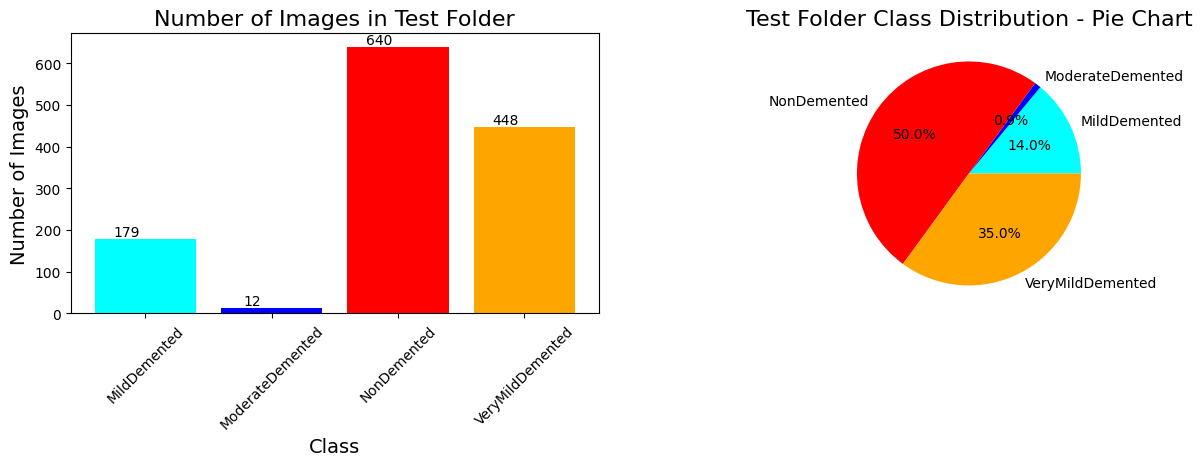

In [19]:
# Test Folder Visualization
test_class_names, test_color_map = get_class_names_and_colors('test', main_folder, colors)
plot_visualizations('test', test_df, main_folder, test_color_map)

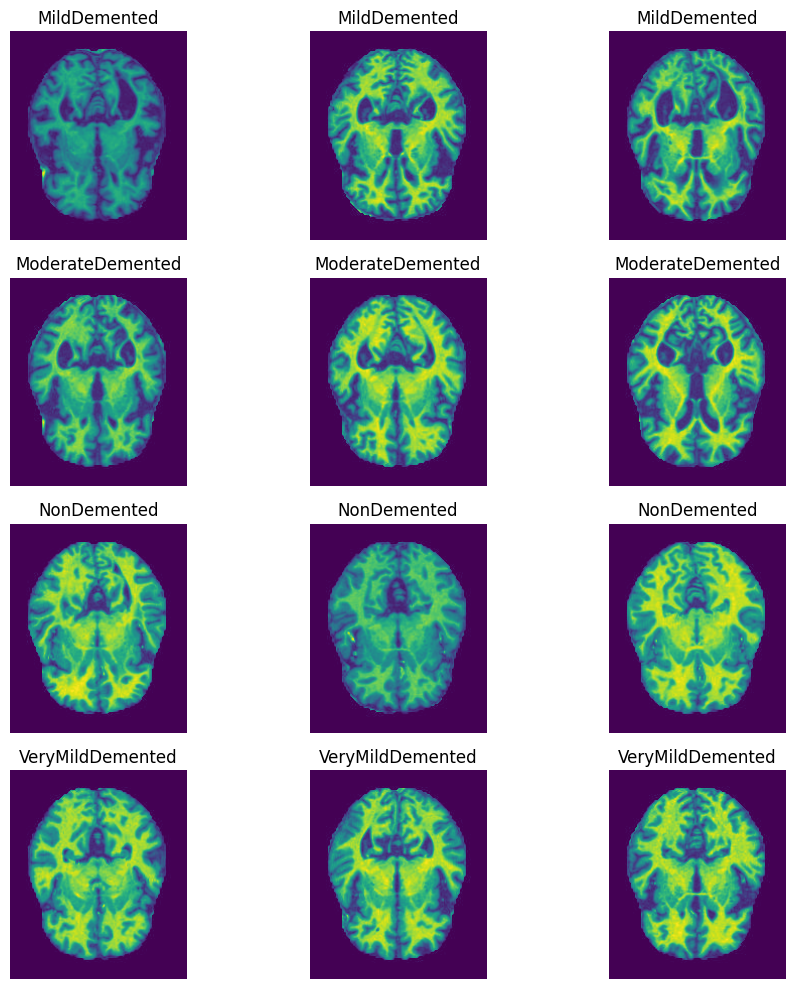

In [8]:
# Show some samples from train ataset
train_folder = 'Alzheimer_s Dataset/train'
class_names = os.listdir(train_folder)
num_images_per_class = 3

plt.figure(figsize=(10, 10))

for class_name in class_names:
    class_folder = os.path.join(train_folder, class_name)
    image_files = os.listdir(class_folder)[:num_images_per_class]
    
    for image_file in image_files:
        image_path = os.path.join(class_folder, image_file)
        image = mpimg.imread(image_path)
        
        plt.subplot(len(class_names), num_images_per_class, class_names.index(class_name) * num_images_per_class + image_files.index(image_file) + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# # Data Preprocessing
Size=(176,176)
work_dr = ImageDataGenerator(
    rescale = 1./255
)
train_data_gen = work_dr.flow_from_dataframe(df,x_col='image',y_col='label', target_size=Size, batch_size=6500, shuffle=False)
train_data, train_labels = train_data_gen.next()

Found 6400 validated image filenames belonging to 4 classes.


In [11]:
# Balancing the imbalance dataset
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 176 * 176 * 3), train_labels)
train_data = train_data.reshape(-1, 176,176, 3)
print(train_data.shape, train_labels.shape)

(12800, 176, 176, 3) (12800, 4)


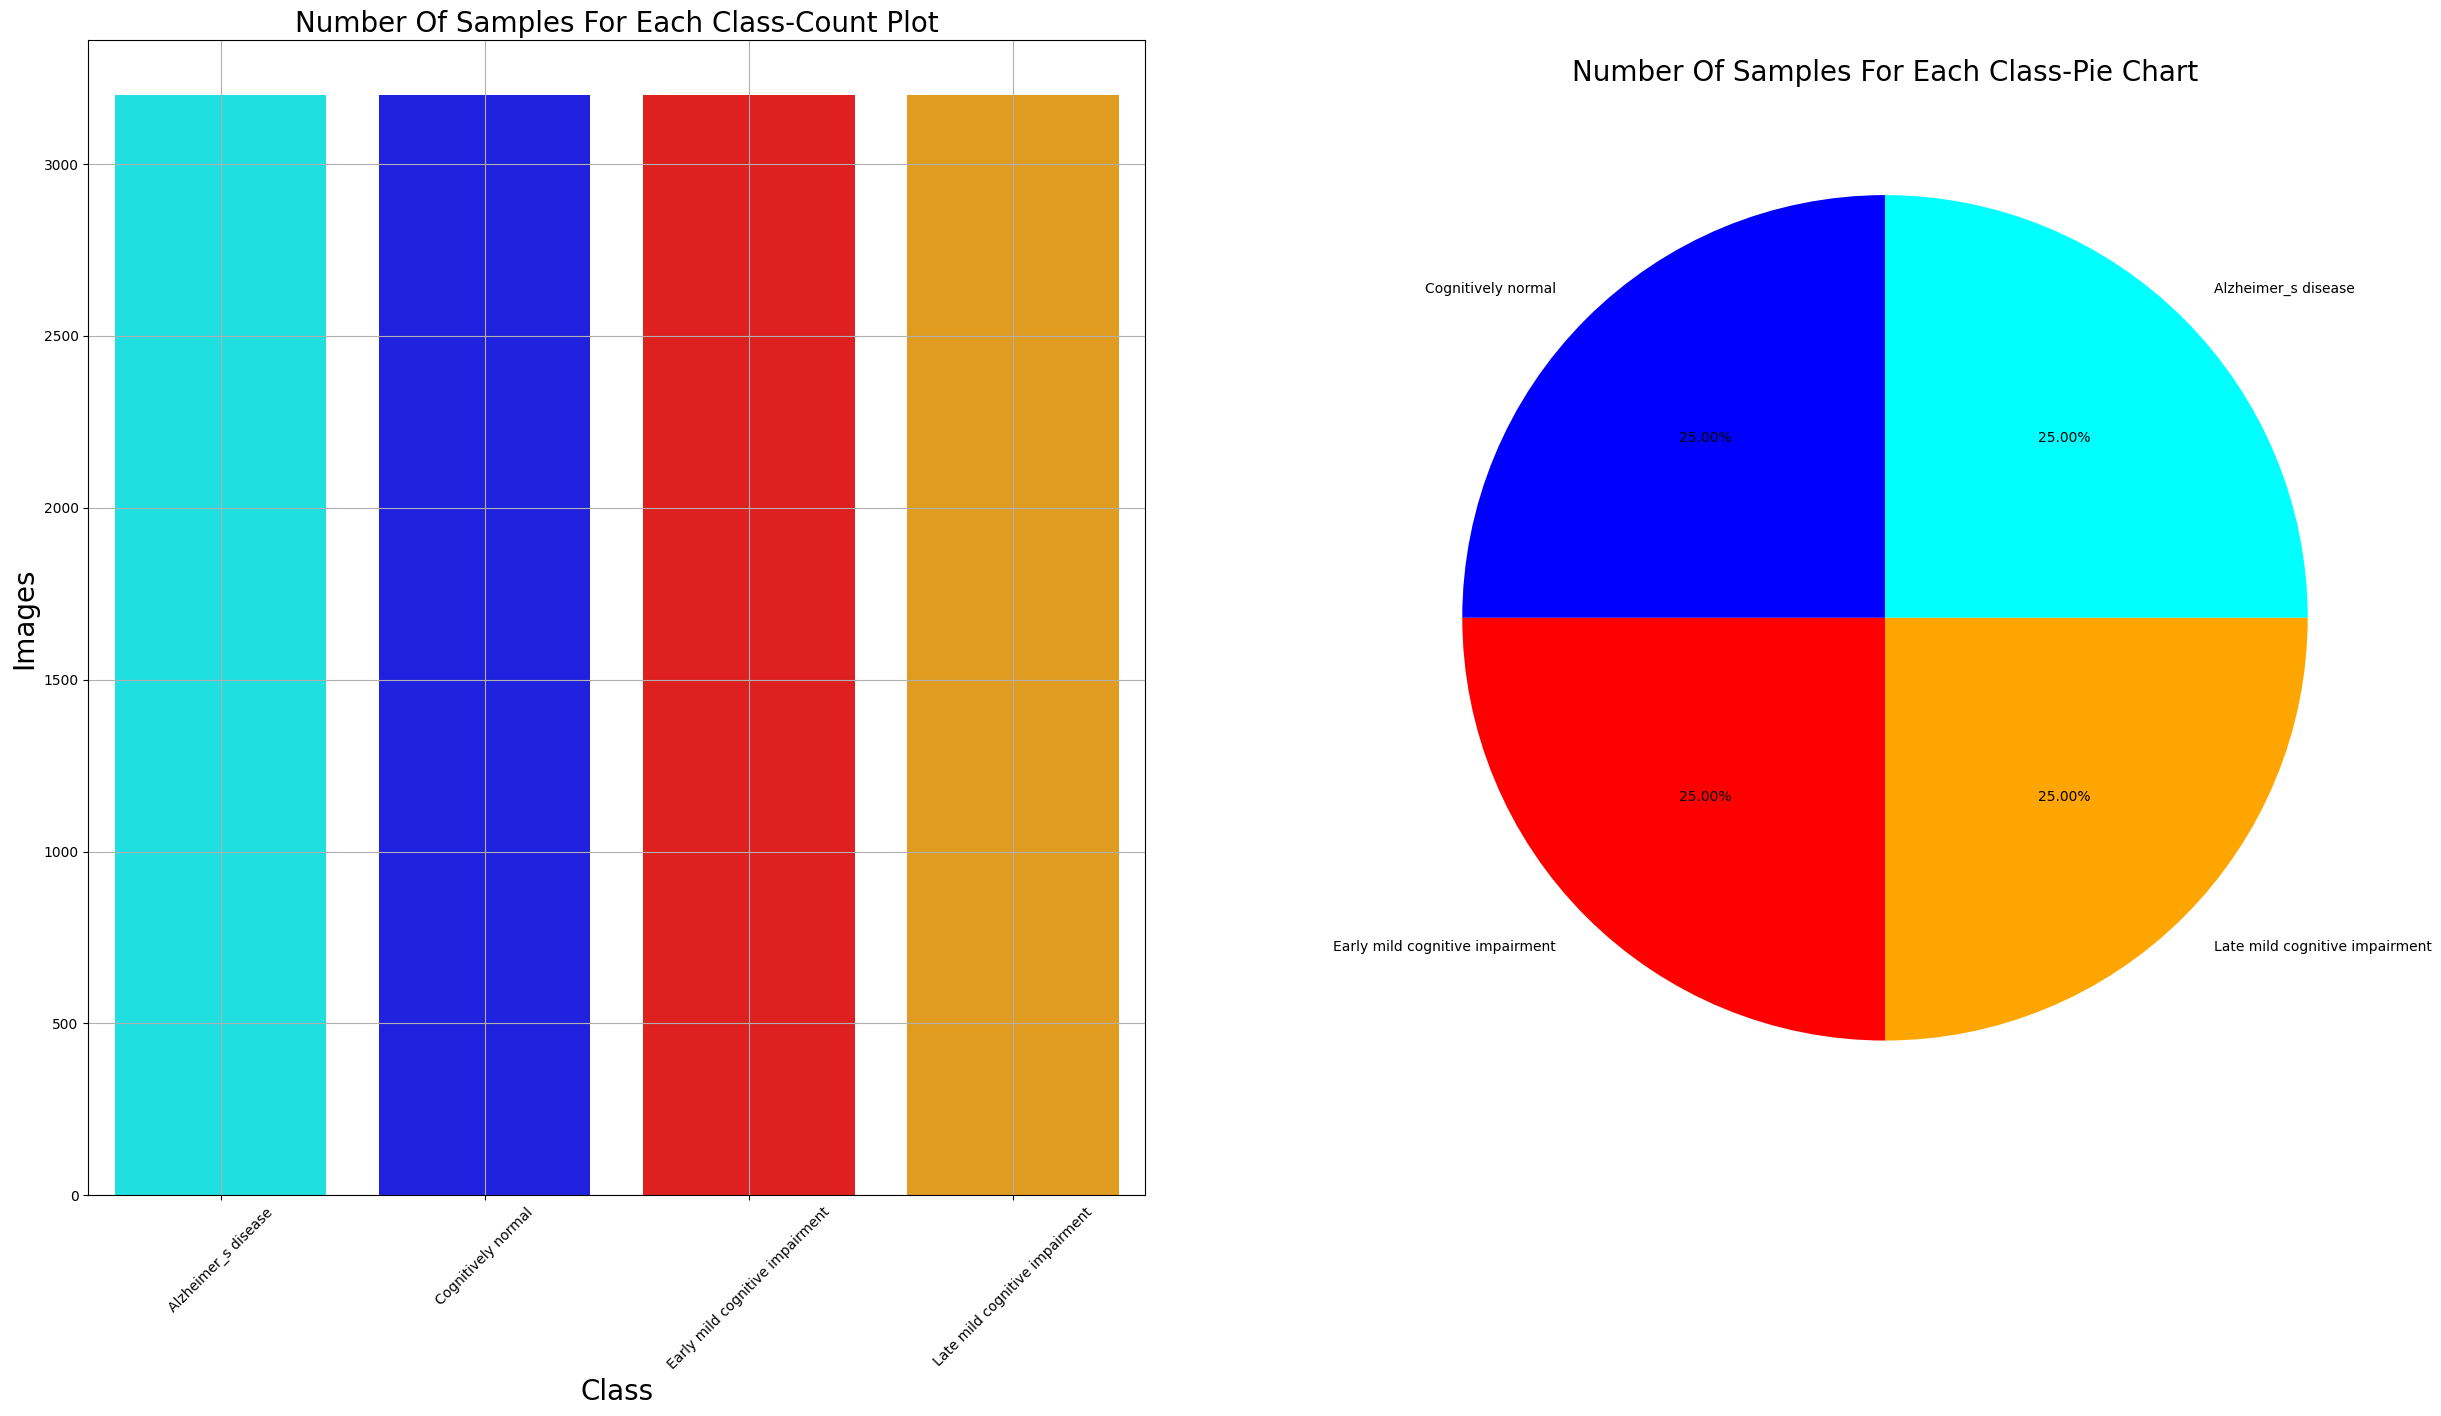

In [12]:
# Visualize the balanced dataset
class_num=np.sort(['Alzheimer_s disease','Cognitively normal','Early mild cognitive impairment','Late mild cognitive impairment'])
labels=[class_num[i] for i in np.argmax(train_labels,axis=1) ]
label_series = pd.Series(labels)

plt.figure(figsize=(30,15))
c = ['cyan', 'blue', 'red', 'orange']
plt.subplot(1, 2, 1)
ax = sns.countplot(x=label_series, hue=label_series,palette=c)
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Images",fontsize=20)
plt.title('Number Of Samples For Each Class-Count Plot',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(x=label_series.value_counts(), autopct='%1.2f%%', labels=label_series.value_counts().index, radius=1, colors=c)
plt.title('Number Of Samples For Each Class-Pie Chart',fontsize=20)

plt.show()

In [13]:
# Test train split 70/30
X_train, X_test1, y_train, y_test1 = train_test_split(train_data,train_labels, test_size=0.3, random_state=42,shuffle=True,stratify=train_labels)
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (8960, 176, 176, 3)
X_test shape is  (1920, 176, 176, 3)
X_val shape is  (1920, 176, 176, 3)
y_train shape is  (8960, 4)
y_test shape is  (1920, 4)
y_val shape is  (1920, 4)


In [14]:
#CNN model
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(176,176,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D((2,2),2,padding='same'))
model.add(keras.layers.Conv2D(128,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D((2,2),2,padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [15]:
# Compiling and Training the Model
checkpoint_cb =ModelCheckpoint("CNN_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train,y_train, epochs=50, validation_data=(X_val,y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
280/280 [==============================] - 102s 251ms/step - loss: 0.8576 - accuracy: 0.5898 - val_loss: 0.5127 - val_accuracy: 0.7885
Epoch 2/50
280/280 [==============================] - 68s 245ms/step - loss: 0.4137 - accuracy: 0.8117 - val_loss: 0.3772 - val_accuracy: 0.8203
Epoch 3/50
280/280 [==============================] - 63s 226ms/step - loss: 0.2286 - accuracy: 0.9029 - val_loss: 0.2431 - val_accuracy: 0.8875
Epoch 4/50
280/280 [==============================] - 65s 233ms/step - loss: 0.1373 - accuracy: 0.9500 - val_loss: 0.1323 - val_accuracy: 0.9500
Epoch 5/50
280/280 [==============================] - 64s 227ms/step - loss: 0.0694 - accuracy: 0.9741 - val_loss: 0.1312 - val_accuracy: 0.9510
Epoch 6/50
280/280 [==============================] - 63s 225ms/step - loss: 0.0637 - accuracy: 0.9778 - val_loss: 0.0716 - val_accuracy: 0.9740
Epoch 7/50
280/280 [==============================] - 62s 220ms/step - loss: 0.0385 - accuracy: 0.9866 - val_loss: 0.1455 - val_a

In [16]:
hist_show=pd.DataFrame(hist.history)
hist_show

,loss,accuracy,val_loss,val_accuracy
0,0.857560,0.589844,0.512693,0.788542
1,0.413668,0.811719,0.377151,0.820312
2,0.228565,0.902902,0.243072,0.887500
3,0.137322,0.950000,0.132285,0.950000
4,0.069401,0.974107,0.131211,0.951042
5,0.063747,0.977790,0.071618,0.973958
6,0.038513,0.986607,0.145452,0.945312
7,0.045606,0.984375,0.177271,0.936458
8,0.032501,0.988951,0.099856,0.969792
9,0.033487,0.987277,0.082088,0.971875


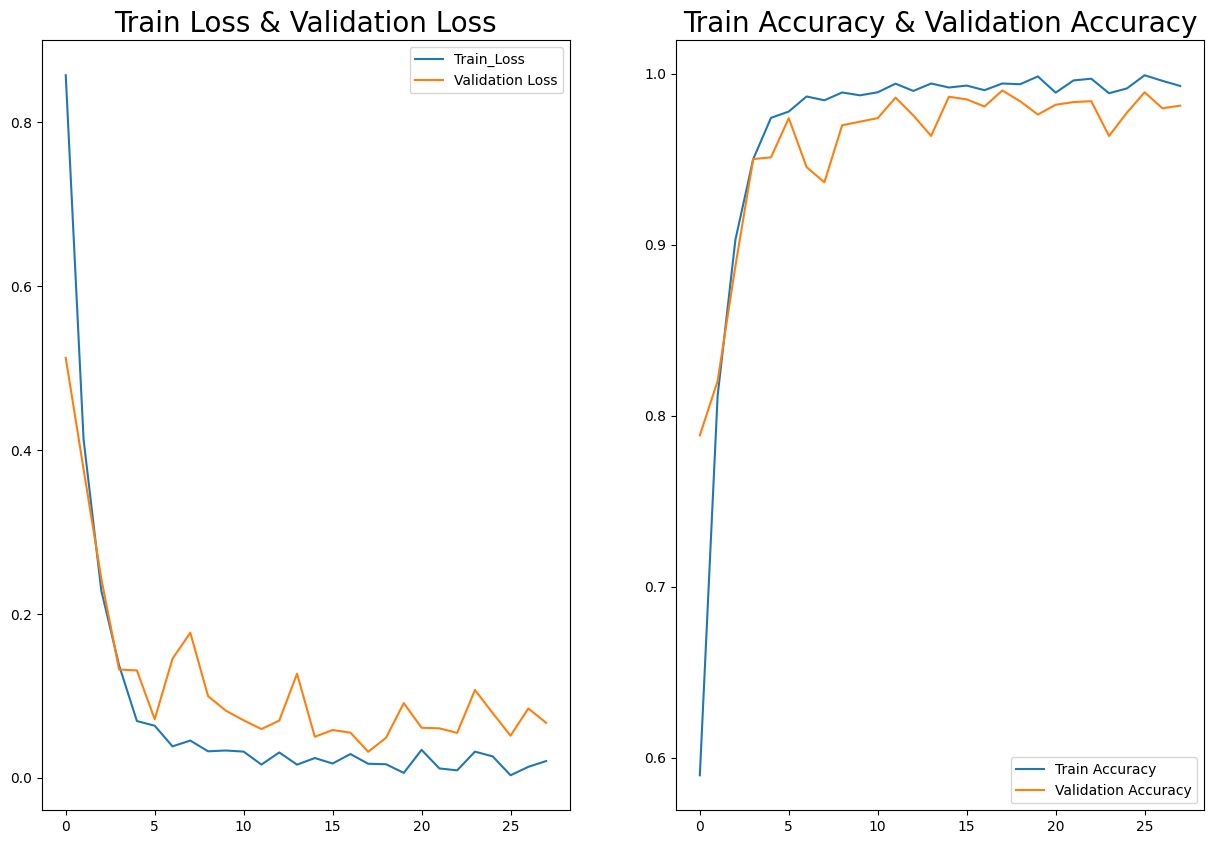

In [17]:
#3 VIsualize the performance
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='Train_Loss')  
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.title('Train Loss & Validation Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.title('Train Accuracy & Validation Accuracy',fontsize=20)
plt.legend()
plt.show()

In [18]:
# Evaluating the Model
score, acc= model.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

60/60 [==============================] - 4s 67ms/step - loss: 0.0478 - accuracy: 0.9870
Test Loss = 0.04784395173192024
Test Accuracy = 0.9869791865348816


In [19]:
# Making Predictions
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=1)
y_test_ = np.argmax(y_test,axis=1)
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

60/60 [==============================] - 4s 64ms/step


,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,2,2
4,2,2
...,...,...
1915,2,2
1916,0,0
1917,2,2
1918,3,3


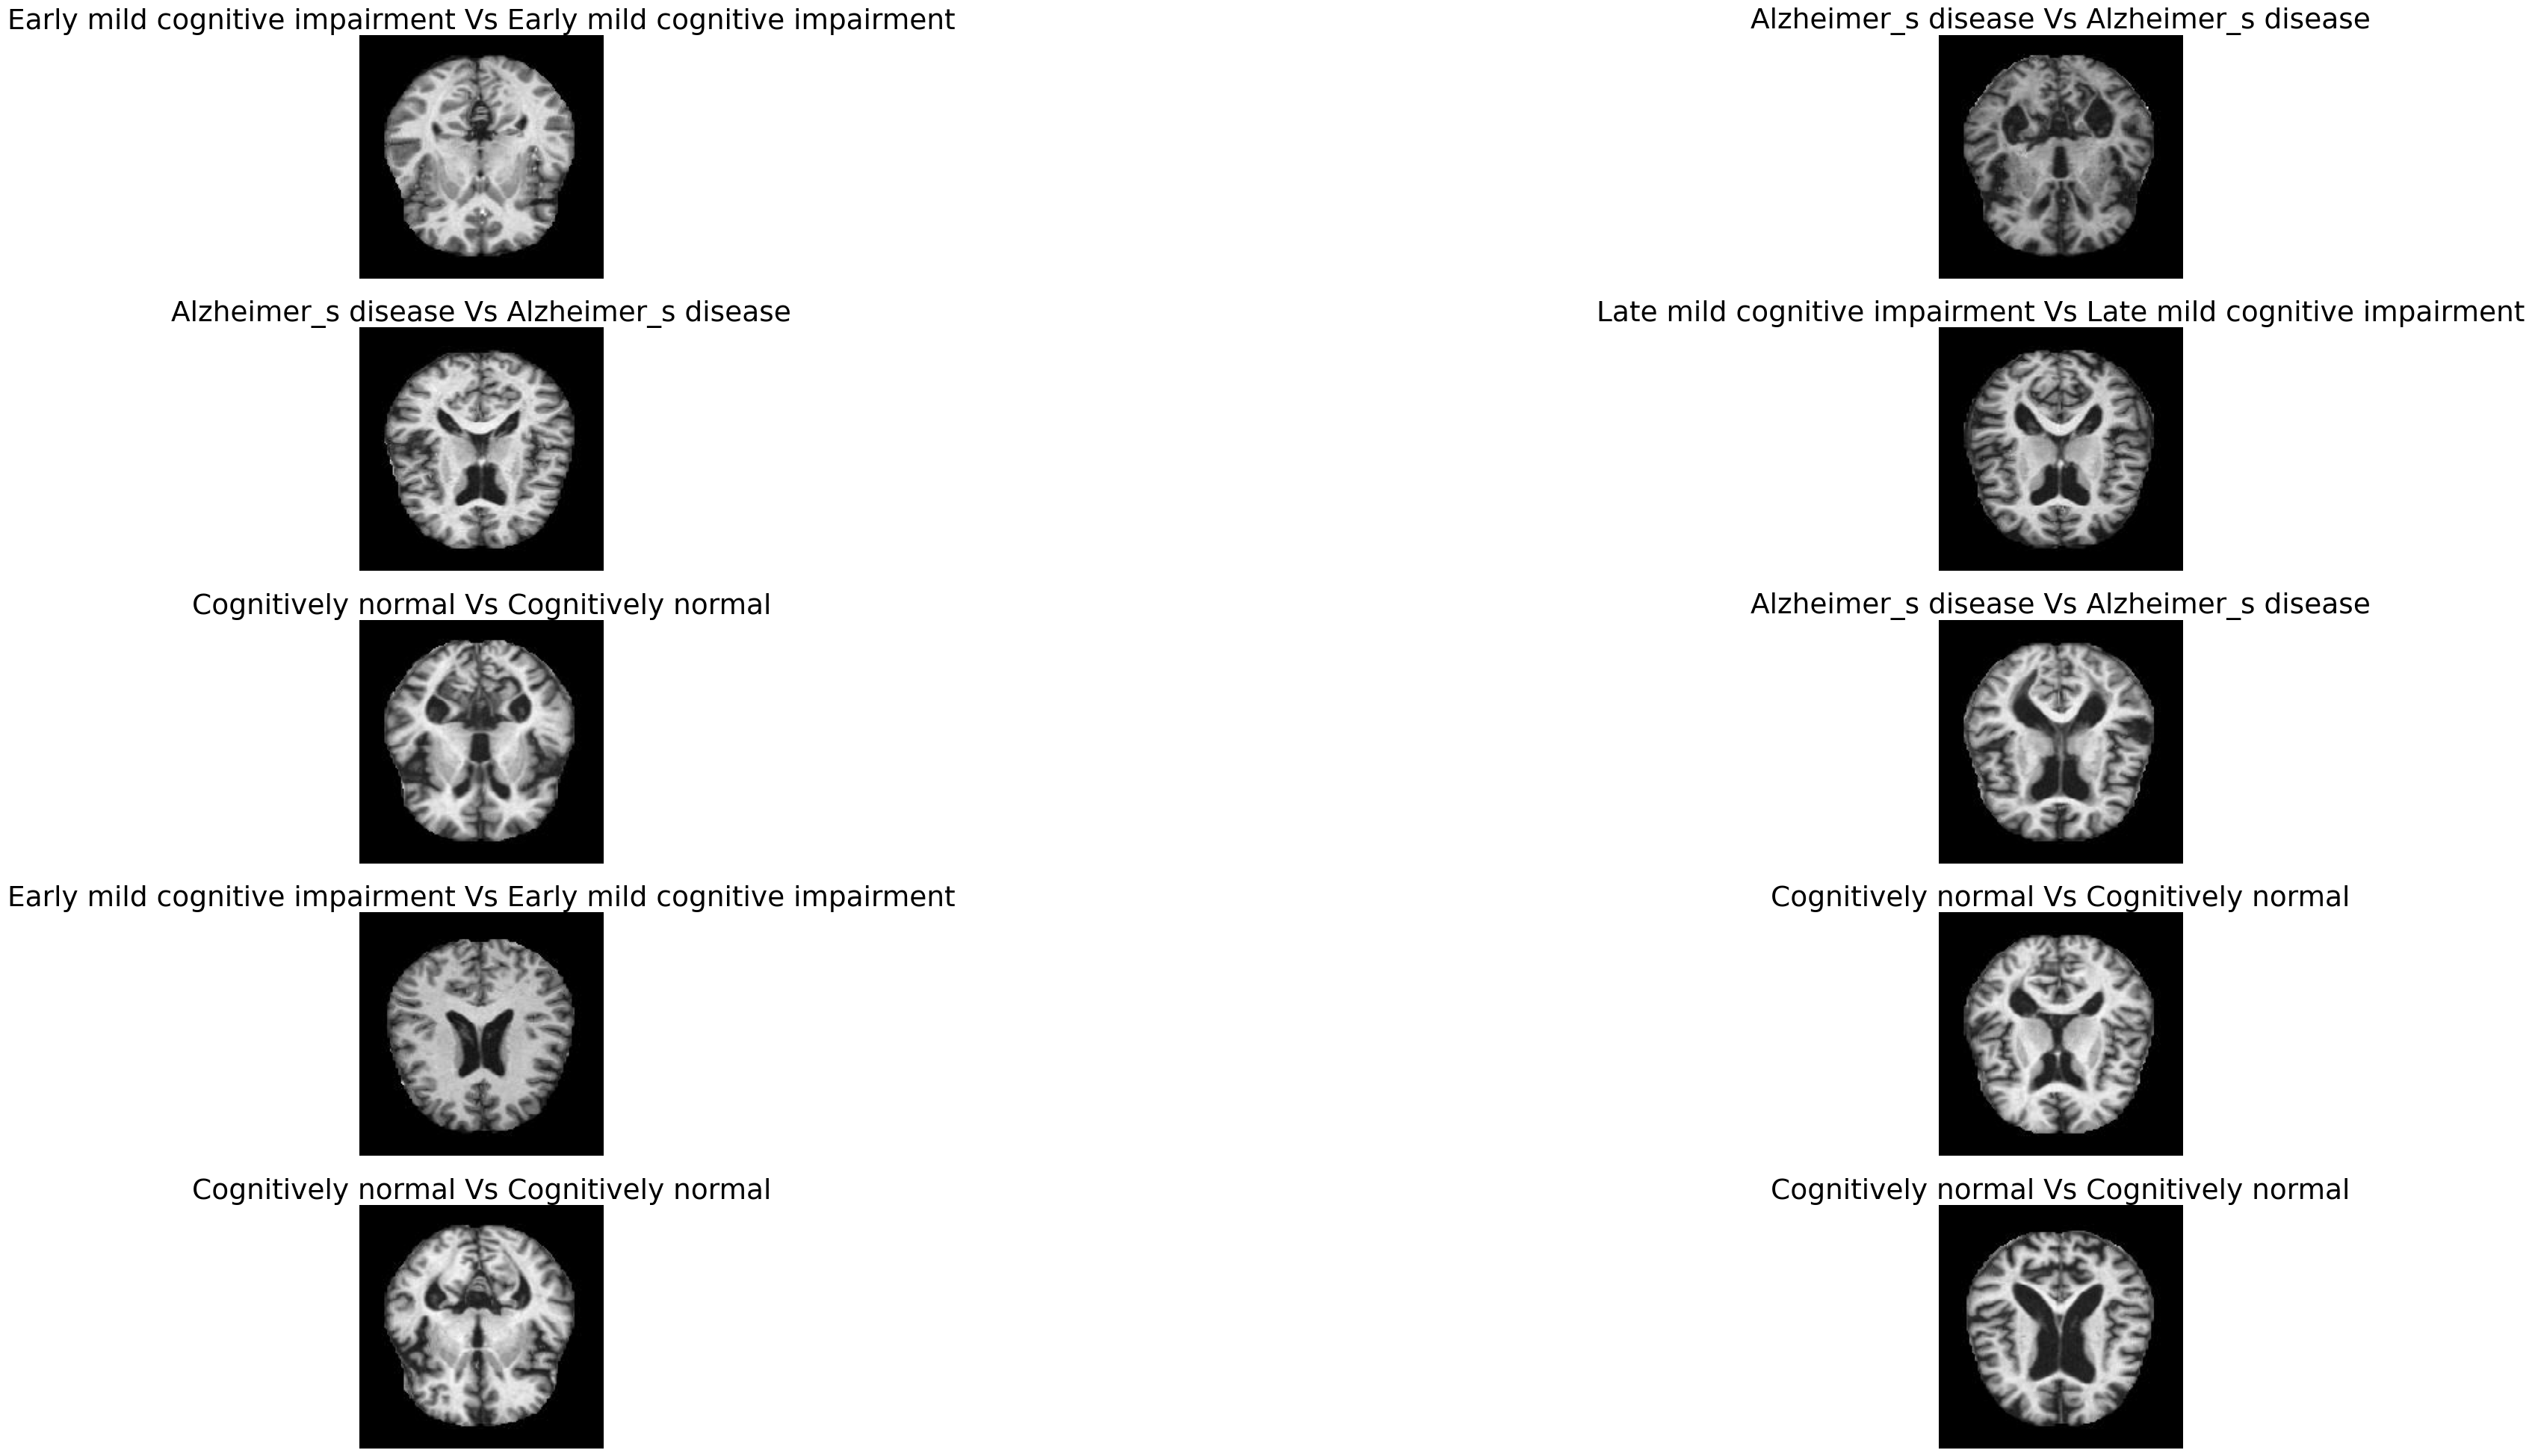

In [20]:
# Visualize the predicted and actual result 
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(X_test),10)):
    plt.subplot(10,2,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f'{class_num[y_test_[i]]} Vs {class_num[y_pred[i]]}',fontsize=27)

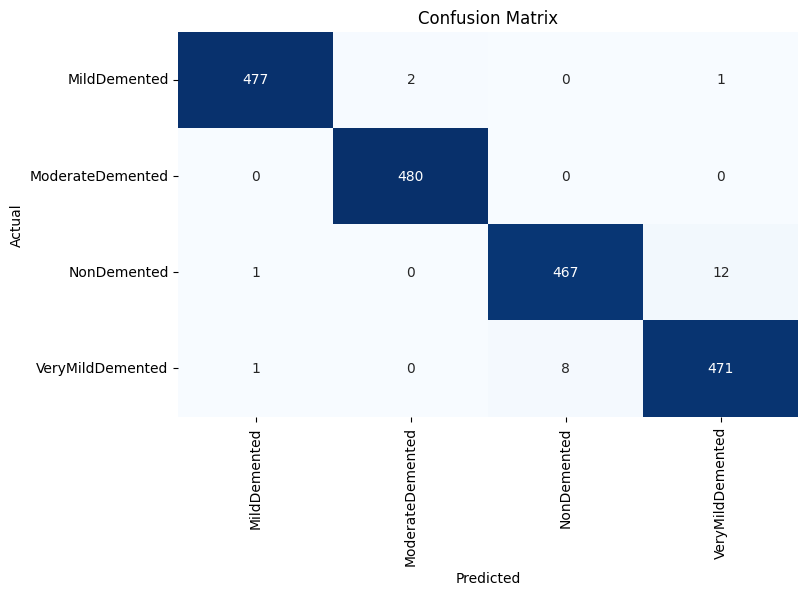

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test_, y_pred )        
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(length)+.5, class_names, rotation= 90)
plt.yticks(np.arange(length)+.5, class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
# Classification report
Clr = classification_report(y_test_,y_pred)
print('Classification Report is : ', Clr)

Classification Report is :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       480
           1       1.00      1.00      1.00       480
           2       0.98      0.97      0.98       480
           3       0.97      0.98      0.98       480

    accuracy                           0.99      1920
   macro avg       0.99      0.99      0.99      1920
weighted avg       0.99      0.99      0.99      1920

